<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Notebook-setup" data-toc-modified-id="Notebook-setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Notebook setup</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Functions</a></span><ul class="toc-item"><li><span><a href="#Function-for-drawing-chromosomal-ideograms" data-toc-modified-id="Function-for-drawing-chromosomal-ideograms-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Function for drawing chromosomal ideograms</a></span></li><li><span><a href="#Function-for-plotting-mCAs-and-marking-gene-positions" data-toc-modified-id="Function-for-plotting-mCAs-and-marking-gene-positions-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Function for plotting mCAs and marking gene positions</a></span></li></ul></li><li><span><a href="#Import-data" data-toc-modified-id="Import-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Import data</a></span><ul class="toc-item"><li><span><a href="#UK-Biobank-autosomal-mCA-calls" data-toc-modified-id="UK-Biobank-autosomal-mCA-calls-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>UK Biobank autosomal mCA calls</a></span></li><li><span><a href="#Possible-significant-genes-involved-by-each-mCA" data-toc-modified-id="Possible-significant-genes-involved-by-each-mCA-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Possible significant genes involved by each mCA</a></span></li></ul></li><li><span><a href="#Distribution-of-mCAs-across-chromosomes-(Supplementary-Figs.-1-2)" data-toc-modified-id="Distribution-of-mCAs-across-chromosomes-(Supplementary-Figs.-1-2)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Distribution of mCAs across chromosomes (Supplementary Figs. 1-2)</a></span></li></ul></div>

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

# Notebook setup

In [6]:
# imported packages
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import csv
import zipfile
from io import TextIOWrapper

In [7]:
plt.style.use('cwpython.mplstyle') #use custom style file

In [8]:
#define the colors from colorbrewer2
orange1 = '#feedde'
orange2 = '#fdbe85'
orange3 = '#fd8d3c'
orange4 = '#e6550d'
orange5 = '#a63603'
blue1 = '#eff3ff'
blue2 = '#bdd7e7'
blue3 = '#6baed6'
blue4 = '#3182bd'
blue5 = '#08519c'
green1 = '#edf8e9'
green2 = '#bae4b3'
green3 = '#74c476'
green4 = '#31a354'
green5 = '#006d2c'
grey1 = '#f7f7f7'
grey2 = '#cccccc'
grey3 = '#969696'
grey4 = '#636363'
grey5 = '#252525'
purple1 = '#f2f0f7'
purple2 = '#cbc9e2'
purple3 = '#9e9ac8'
purple4 = '#756bb1'
purple5 = '#54278f'
red1 = '#fee5d9'
red2 = '#fcae91'
red3 = '#fb6a4a'
red4 = '#de2d26'
red5 = '#a50f15'

In [9]:
neutral_line = '#ff7f00' #colorbrewer2 orange
neutral_text = '#ff7f00' #colorbrewer2 orange
loss_color = '#1f78b4' #colorbrewer2 blue
loss_text = '#1f78b4' #colorbrewer2 blue
gain_color = '#fb9a99' #colorbrewer2 pink
gain_text = gain_color

In [10]:
color_type_dict = {'c_gain': '#e31a1c', 'b_neutral': '#fdbf6f', 'a_loss': '#a6cee3'}

# Functions

## Function for drawing chromosomal ideograms

In [11]:
def ideograms(ideogram_file, chromosome):
    
    color_lookup = {'gneg': (1., 1., 1.),
                    'gpos25': (.6, .6, .6),
                    'gpos50': (.4, .4, .4),
                    'gpos75': (.2, .2, .2),
                   'gpos100': (0., 0., 0.),
                      'acen': (.8, .4, .4),
                      'gvar': (.8, .8, .8),
                     'stalk': (.9, .9, .9)}
    
    ideogram = open(ideogram_file)
    ideogram.readline()
    xranges = []
    colors = []
    mid_points = []
    labels = []

    for line in ideogram:
        chrom, start, stop, label, stain = line.strip().split('\t')
        start = int(start)
        stop = int(stop)
        width = stop - start
        mid_point = start + (width/2)
        if chrom == chromosome:
            xranges.append((start, width))
            colors.append(color_lookup[stain])
            mid_points.append(mid_point)
            labels.append(label)
        
    return xranges, [0, 0.9], colors, mid_points, labels

## Function for plotting mCAs and marking gene positions

In [12]:
def plot_gene(gene_midpoint, gene_name, association, y_val, ax):
    if association == 'CNLOH':
        color_choice = neutral_line
        text_color = neutral_text
    if association == 'Loss':
        color_choice = loss_color
        text_color = loss_text
    if association == 'Gain':
        color_choice = gain_color
        text_color = gain_text
    ax.plot([gene_midpoint, gene_midpoint], [0, y_val+1], linestyle = ':', lw = 1.5, color = color_choice)
    ax.text(gene_midpoint, (y_val+1)*1.02, gene_name, ha = 'left', fontsize = 10, color = text_color, style='italic', fontweight = 'bold', rotation = 45)
    return ax

In [13]:
def plot_gene_CH(gene_midpoint, gene_name, y_val, ax):
    ax.plot([gene_midpoint, gene_midpoint], [0, y_val+1], linestyle = ':', lw = 1.5, color = grey3)
    ax.text(gene_midpoint, (y_val+1)*1.02, gene_name, ha = 'left', fontsize = 10, color = grey3, style='italic', rotation = 45)
    return ax

In [14]:
def plot_region(gene_midpoint, gene_name, association, y_val, ax):
    if association == 'CNLOH':
        color_choice = neutral_line
        text_color = neutral_text
    if association == 'Loss':
        color_choice = loss_color
        text_color = loss_text
    if association == 'Gain':
        color_choice = gain_color
        text_color = gain_text
    ax.plot([gene_midpoint, gene_midpoint], [0, y_val+1], linestyle = ':', lw = 1.5, color = color_choice)
    ax.text(gene_midpoint, (y_val+1)*1.02, gene_name, ha = 'center', fontsize = 10, color = text_color, style='italic')
    return ax

In [15]:
def plot_deletion(gene_midpoint, gene_name, association, y_val, ax):
    if association == 'CNLOH':
        color_choice = neutral_line
        text_color = neutral_text
    if association == 'Loss':
        color_choice = loss_color
        text_color = loss_text
    if association == 'Gain':
        color_choice = gain_color
        text_color = gain_text
    ax.text(gene_midpoint, (y_val+1)*1.02, gene_name, ha = 'center', fontsize = 10, color = text_color, style='italic')
    return ax

In [16]:
def shade_deletion(start, stop, name, y_val, ax):
    ax.fill_between([start, stop], [0, 0], [y_val+1, y_val+1], facecolor="none", hatch="//////", edgecolor=grey2, linewidth=0.0, alpha = 0.5)
    ax.fill_between([start, stop], [0, 0], [y_val+1, y_val+1], color='white', linewidth=0.0, alpha = 0.4)  
    ax.text(((stop+start)/2), (y_val+1)*1.02, name, ha = 'center', fontsize = 10, color = loss_text, style='italic')
    return ax

In [17]:
def distribution_mCA(chromosome, genes_involved, total_mCAs, CNV_dict):
    plt.close('all')
    gs_kw = dict(width_ratios=[1], height_ratios=[8, 1])
    fig, axes = plt.subplots(figsize=(15, 6), nrows=2, ncols=1, gridspec_kw=gs_kw)
    fig.subplots_adjust(hspace=0.02, wspace = 0.02)

    ax1 = axes[0]
    ax2 = axes[1]

    # Plot data
    positions = []
    for k, v in CNV_dict.items():
        type_of_change = v[5]
        total_mCAs_per_person = v[10]
        if type_of_change == 'gain':
            type_of_change = 'c_gain'
        if type_of_change == 'loss':
            type_of_change = 'a_loss'
        if type_of_change == 'neutral':
            type_of_change = 'b_neutral'
        if v[1] == chromosome:
            start = int((v[2])*1000000)
            end = int((v[3])*1000000)
            width = end-start
            if total_mCAs == 'all':
                positions.append((start, end, width, type_of_change))
            else:
                if total_mCAs_per_person == total_mCAs:
                    positions.append((start, end, width, type_of_change))

    positions.sort(key = lambda x: (x[3], x[2]), reverse = True) #sort the positions list by width (with widest change first)

    sorted_positions = []
    
    y_val = 0
    
    for i in positions: #iterate through the width sorted list and add 1 to the y for each mCA (as width decreases)
        start = i[0]
        end = i[1]
        width = i[2]
        color_type = color_type_dict[i[3]]
        sorted_positions.append((start, end, width, y_val, color_type))
        y_val+=1

    for i in sorted_positions: #iterate through the sorted list
        y_value = i[3]
        color_type = i[4]
        ax1.plot([i[0], i[1]], [y_value, y_value], color = color_type, lw = 2)
        
    ###### PLOT GENES ######    
    genes_possibly_involved = genes_involved[chromosome]
    for i in genes_possibly_involved:
        gene_name = i[0]
        midpoint = i[1]
        effect = i[2]
        if (effect != '') and (effect in ['Gain', 'Loss', 'CNLOH']):
            plot_gene(midpoint, gene_name, effect, y_val, ax1)
        else:
            plot_gene_CH(midpoint, gene_name, y_val, ax1)
        
    if chromosome == 'chr5':
        shade_deletion(136200000,139500000, '5q31.2', y_val, ax1)
        shade_deletion(149800000,152700000, '5q33.1', y_val, ax1)
        
    if chromosome == 'chr14':
        shade_deletion(106032614, 107288051, 'IGH locus', y_val, ax1) #IGH locus
   
    if chromosome == 'chr16':
        shade_deletion(28100000, 34600000, 'del(16p11.2)', y_val, ax1)     
        
    if chromosome == 'chr20':  
        plot_deletion(38000000, 'del(20q)', 'Loss', y_val, ax1)
        
    if chromosome == 'chr22':
        plot_region(22600000, 'IGL locus (22q11.2)', 'Loss', y_val, ax1)        

    ##### Plot chromosome #####
    xranges, yrange, colors, midpoints, labels = ideograms('Data_files/Chromosome_ideogram_hg19.txt', chromosome)

    ax2.broken_barh(xranges, yrange, facecolors= colors, edgecolor = 'black')

    end_chromosome = xranges[-1][0]+xranges[-1][1]+1000000

    ax1.set_xticks([])
    ax1.set_xlim(0, end_chromosome)
    ax2.set_xlim(0, end_chromosome)
    
    ax1.set_ylim(0, y_val+10)

    ax2.set_xticks(midpoints)
    ax2.set_xticklabels(labels, rotation = 90, fontsize = 9)
    ax2.set_yticks([])
    ax2.text(-0.06, 0.35, chromosome, transform=ax2.transAxes, fontsize = 14, fontweight = 'bold')
    ax2.text(1.005, 0.35, str(int(end_chromosome/1000000))+' MB', transform=ax2.transAxes, fontsize = 10, fontweight = 'bold', ha = 'left')

    ax1.yaxis.set_tick_params(width=1.0, color = grey3, length = 6)
    ax2.xaxis.set_tick_params(width=0.8, color = grey3, length = 6)

    ax1.spines['bottom'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    ax2.spines['bottom'].set_visible(False)
    
    ax1.set_ylabel('mCA number (ranked by size)')

    plt.minorticks_off()
    
    #set panel legends
    legend_marker_size = 8
    legend_elements = [Line2D([0], [0], marker = '_', color = color_type_dict['c_gain'], alpha = 1.0, markersize = legend_marker_size, \
                              lw=3, label='gain'),
                       Line2D([0], [0], marker = '_', color=color_type_dict['a_loss'], alpha=1.0, markersize = legend_marker_size, \
                              lw=3, label='loss'),
                       Line2D([0], [0], marker = '_', color=color_type_dict['b_neutral'], alpha=1.0, markersize = legend_marker_size, \
                              lw=3, label='neutral')]

    legend1 = ax1.legend(ncol=4, handles=legend_elements, loc='center', bbox_to_anchor=(0.875, 1.1), frameon=True, fontsize = 11)
    
    plt.tight_layout()
#     plt.savefig('Figures/Distribution_of_mCAs_across_chromosomes/'+str(chromosome)+'total_mCAs_'+str(total_mCAs)+'_with_extra_genes.pdf')
    
    return plt.show()

# Import data

## UK Biobank autosomal mCA calls

In [18]:
# create a dictionary from annotated mCA calls
with zipfile.ZipFile('Data_files/Supplementary_data_annotated_cw.csv.zip') as zf:
    with zf.open('Supplementary_data_annotated_cw.csv', 'r') as infile:
        read_reader = csv.reader(TextIOWrapper(infile, 'utf-8'))  #csv.reader returns a reader object which will iterate over lines in the csvfile
        row_count = 0
        CNV_dict = {}

        for row in read_reader:
            if row_count>0:
                ID = int(row[1])
                sex = row[2]
                age = row[3]
                prev_cancer = int(row[4])
                chrom = 'chr'+(row[5])
                start_mb = float(row[6])
                end_mb = float(row[7])
                size_mb = float(row[8])
                copy_change = row[11]
                cell_frac = row[12]
                total_mCAs = int(row[22])
                if cell_frac != 'unknown':
                    CNV_dict[row_count]=(float(cell_frac), chrom, start_mb, end_mb, size_mb, copy_change, ID, sex, age, prev_cancer, total_mCAs)

            row_count += 1

## Possible significant genes involved by each mCA

In [16]:
# create a dictionary of gene names with which to annotate the chromosomes
genes_involved_per_chromosome = {}

genes_involved_table = ('Data_files/Possible_genes_involved.csv')
with open(genes_involved_table, encoding = "ISO-8859-1") as table:
    reader = csv.reader(table)
    row_count=0
    for row in reader:
        if row_count>0:
            chromosome = row[0]
            gene = row[1]
            gene_or_region = row[2]
            effect = row[3]
            if gene_or_region == 'Gene':
                start = int(row[5])
                end = int(row[6])
                mid_point = (end+start)/2
                if 'chr'+chromosome in genes_involved_per_chromosome.keys():
                    genes_involved_per_chromosome['chr'+chromosome].append((gene, mid_point, effect))
                else:
                    genes_involved_per_chromosome['chr'+chromosome]=[(gene, mid_point, effect)]
       
        row_count+=1

# Distribution of mCAs across chromosomes (Supplementary Figs. 1-2)

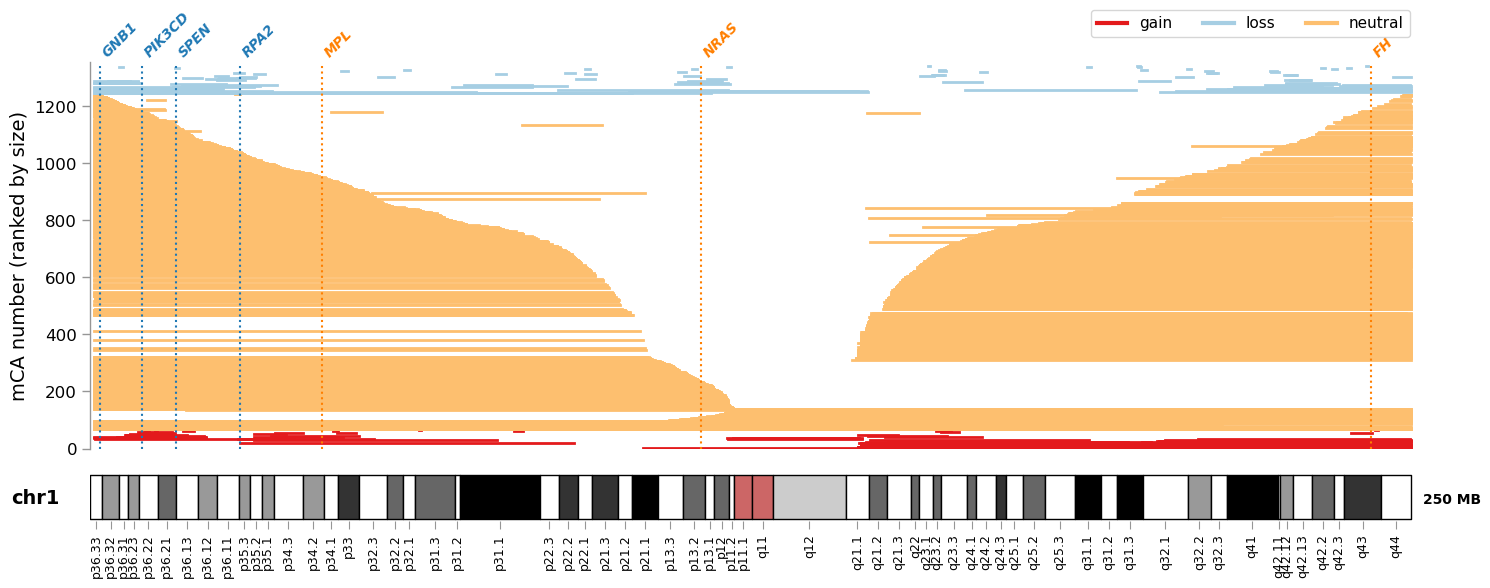

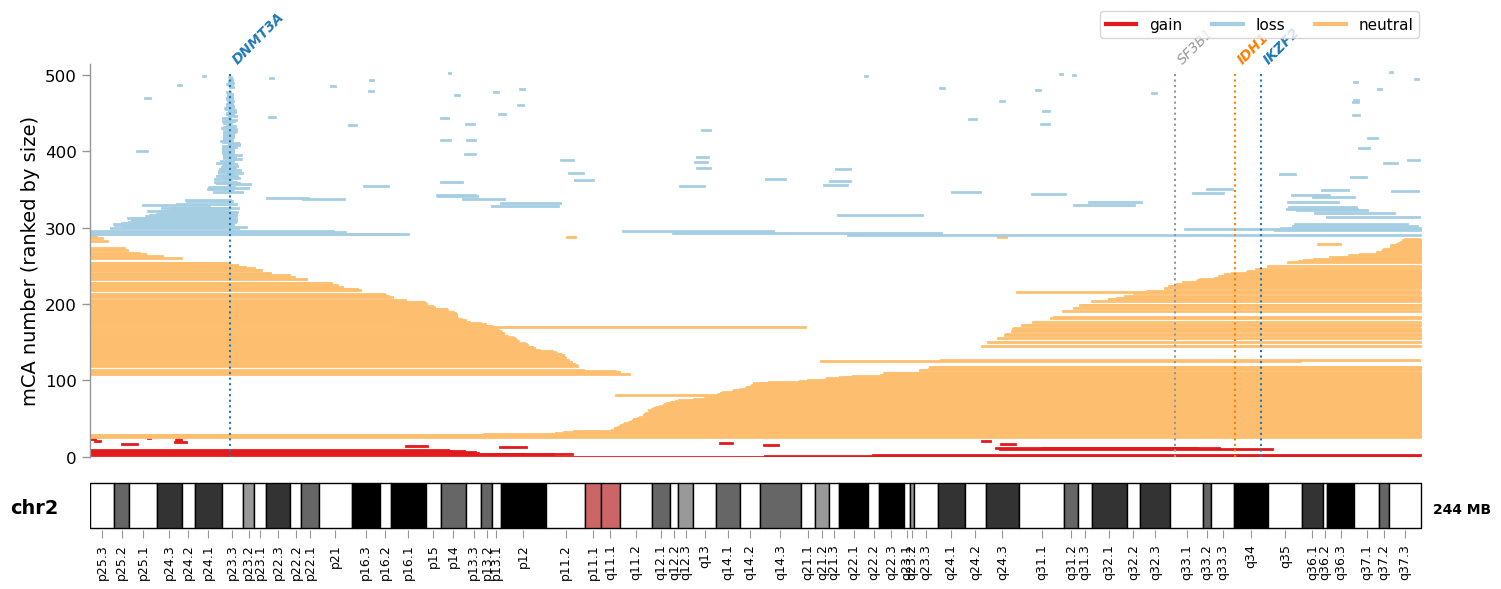

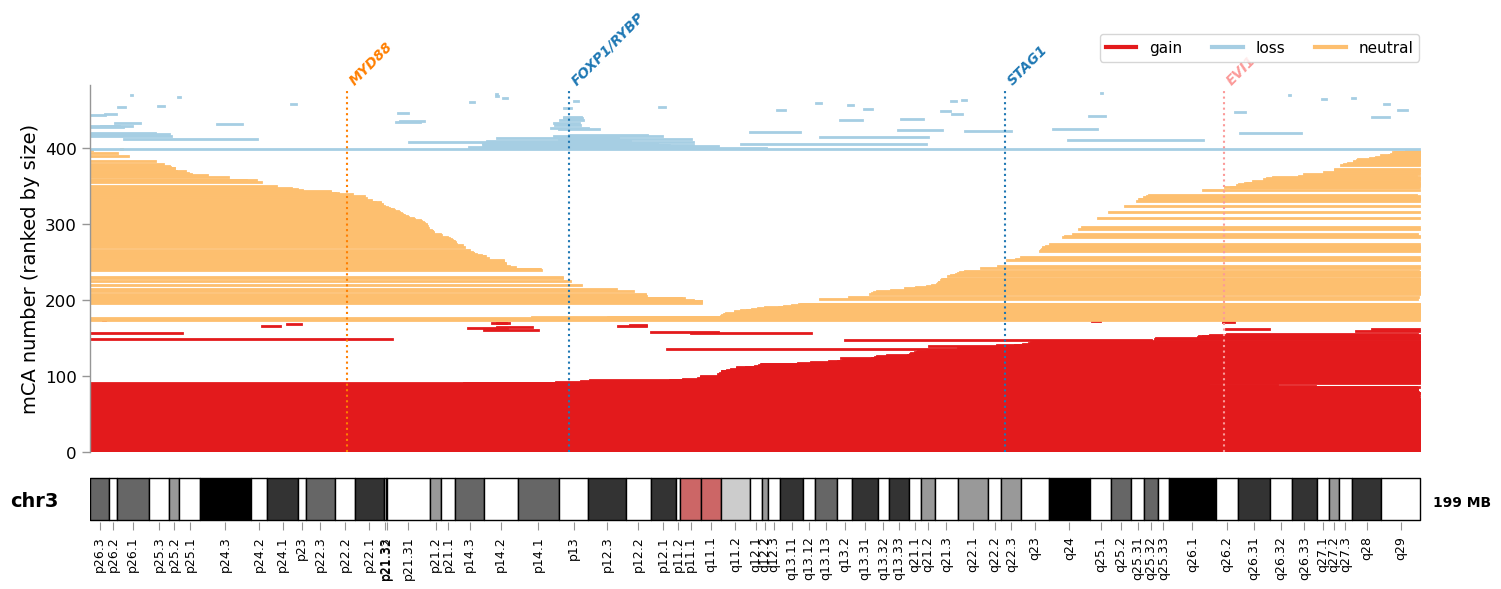

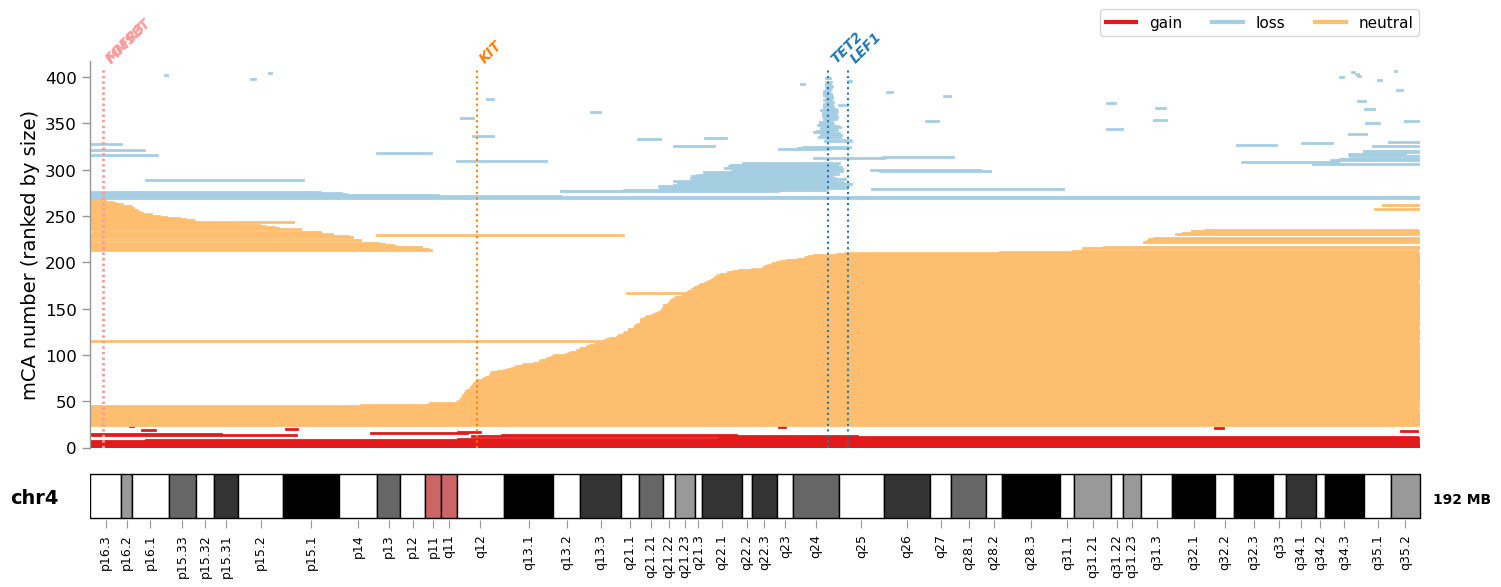

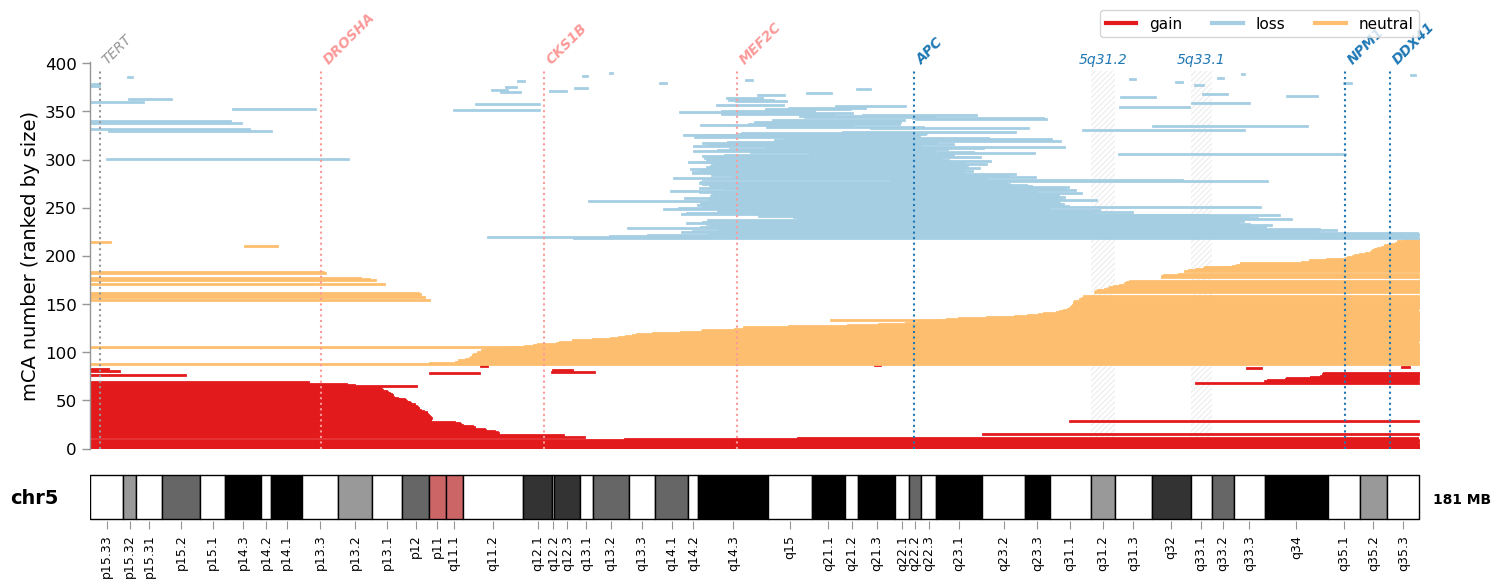

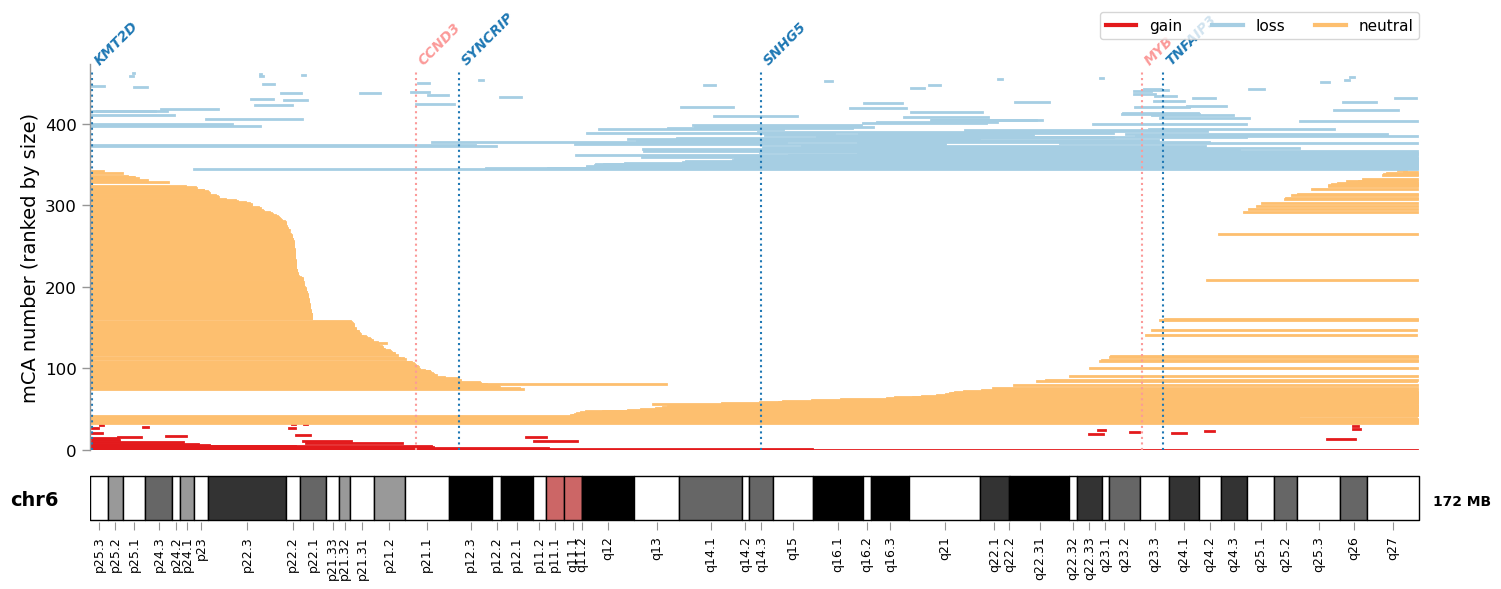

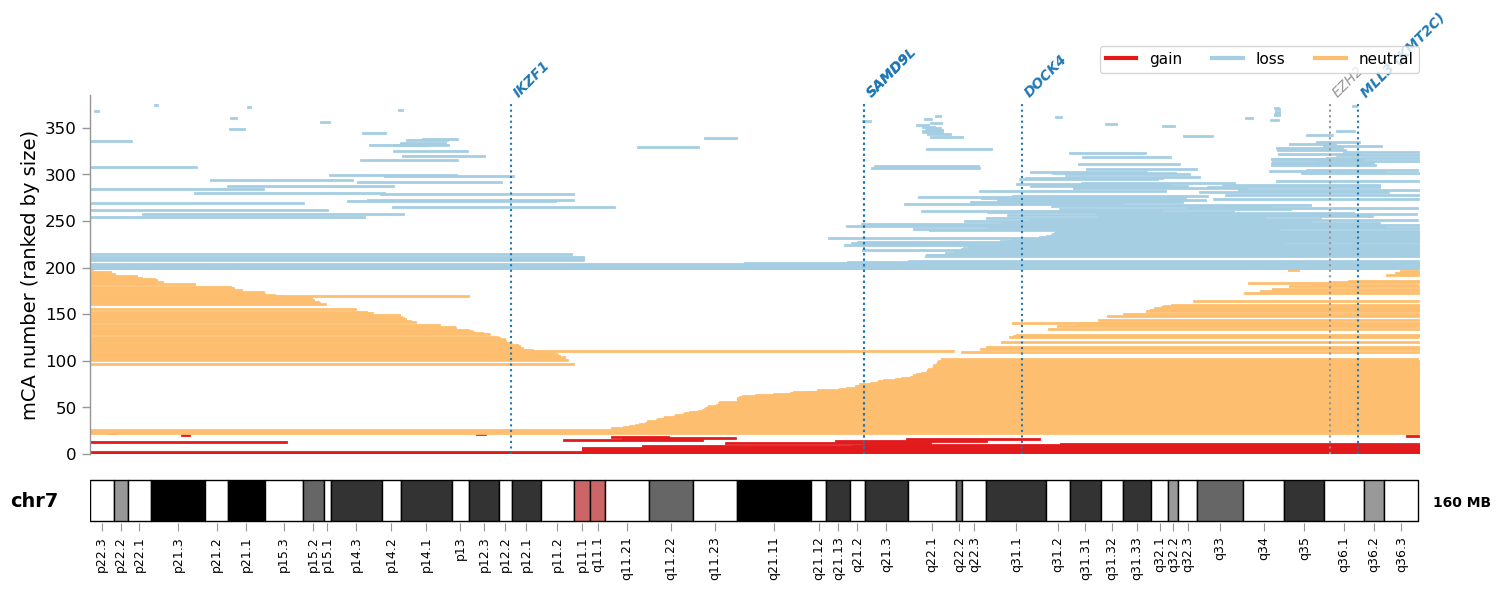

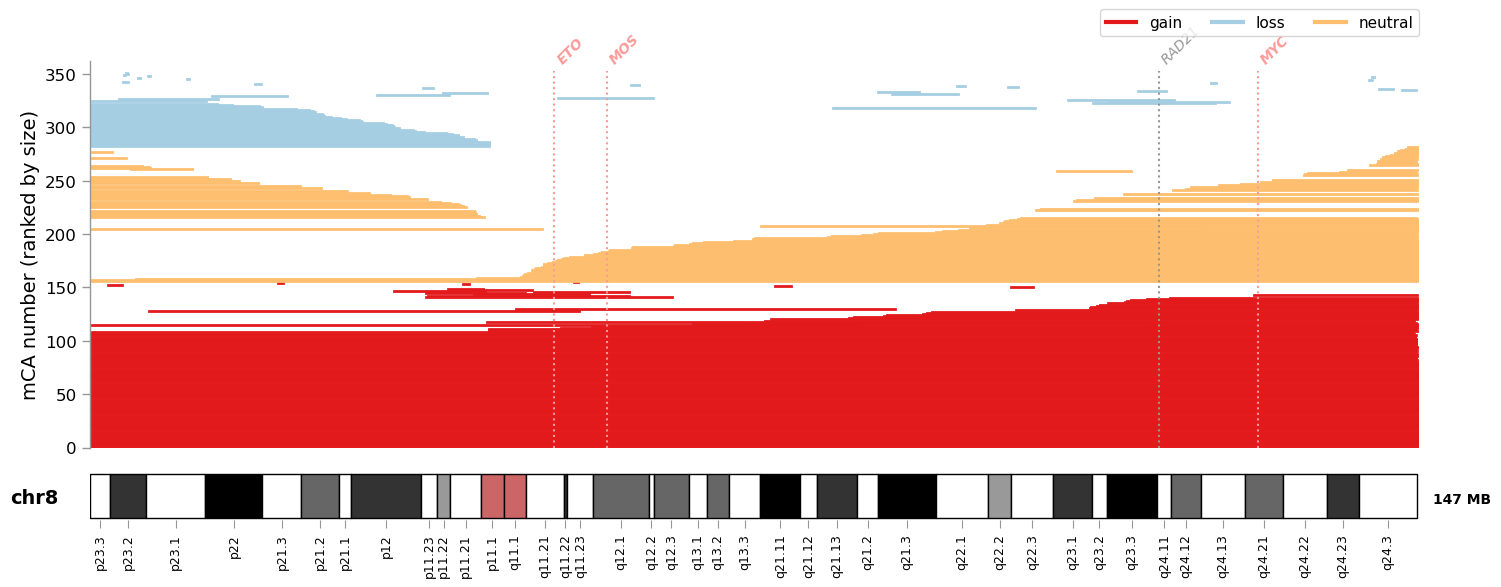

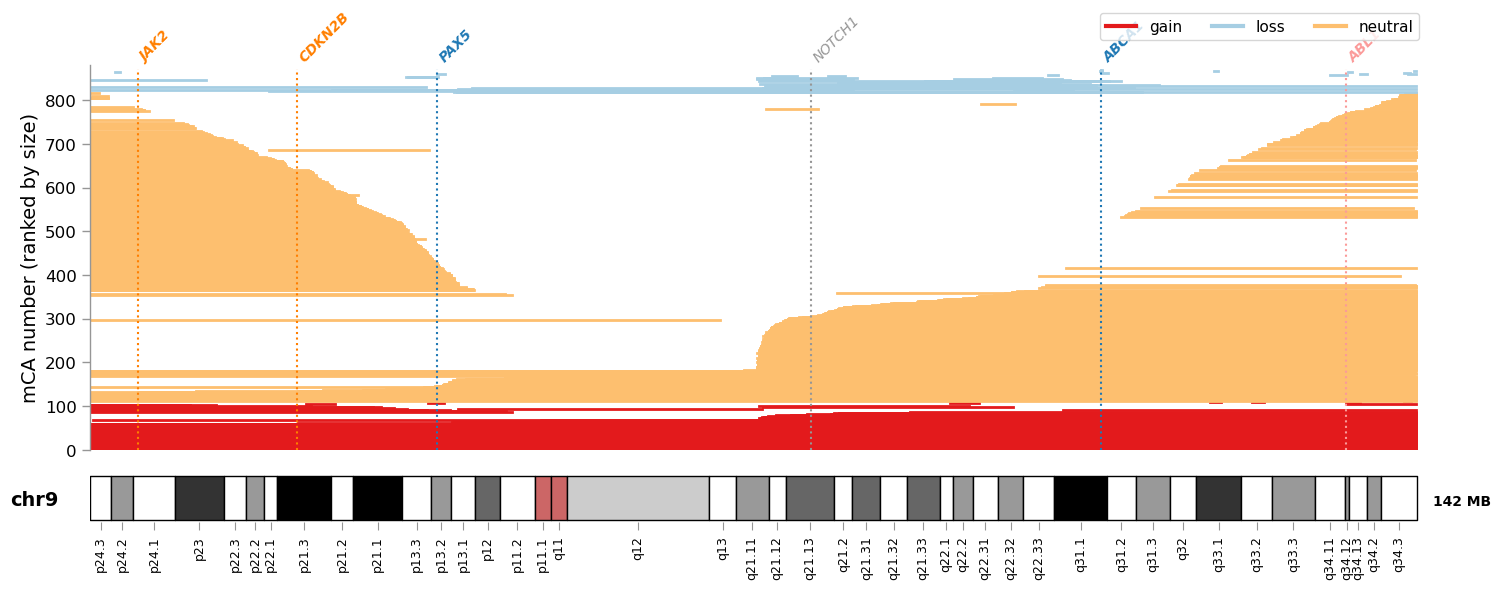

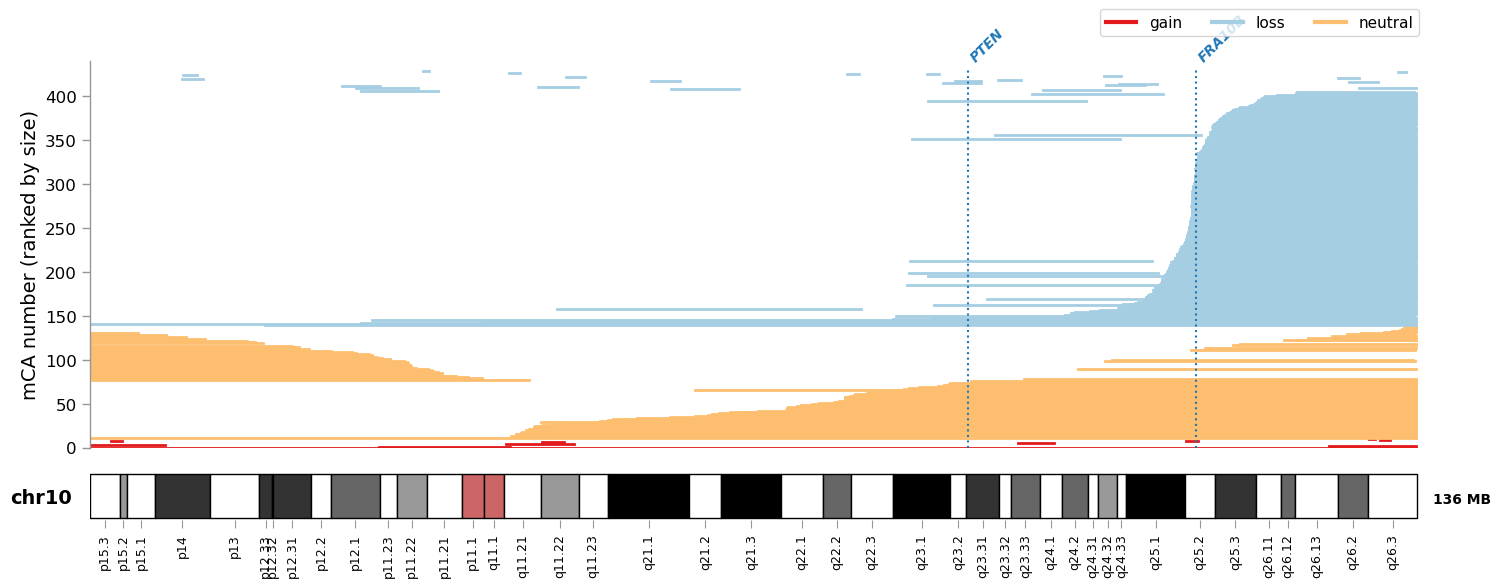

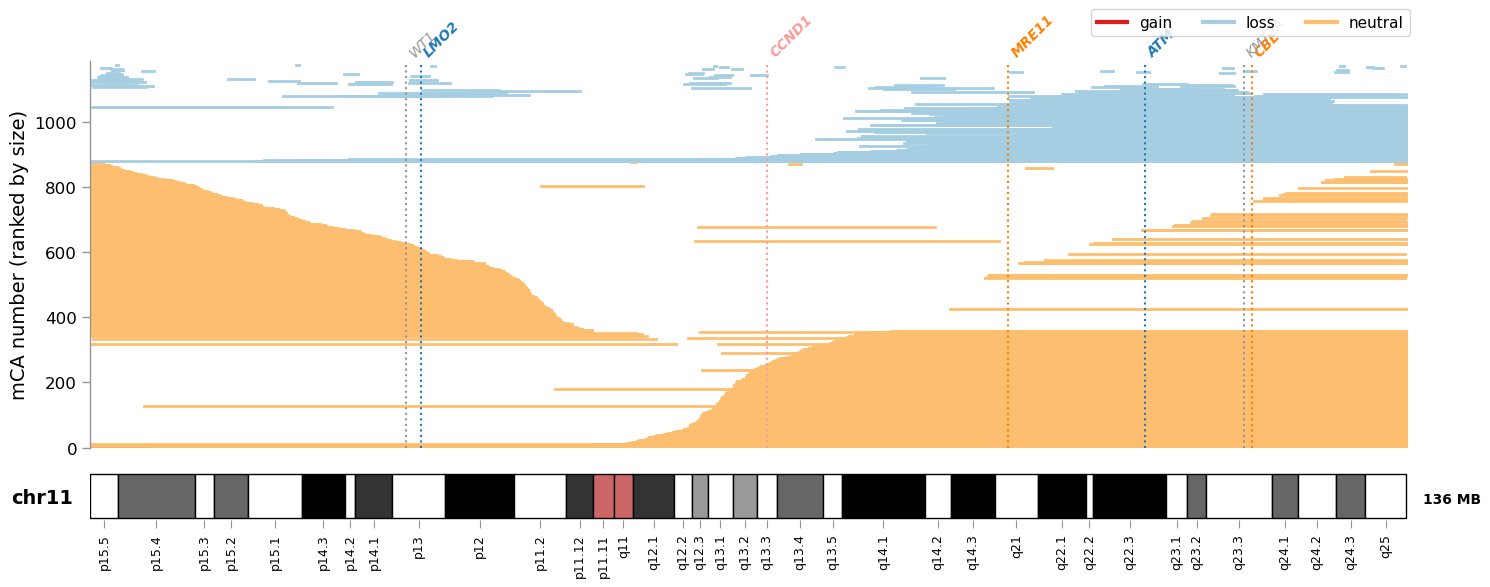

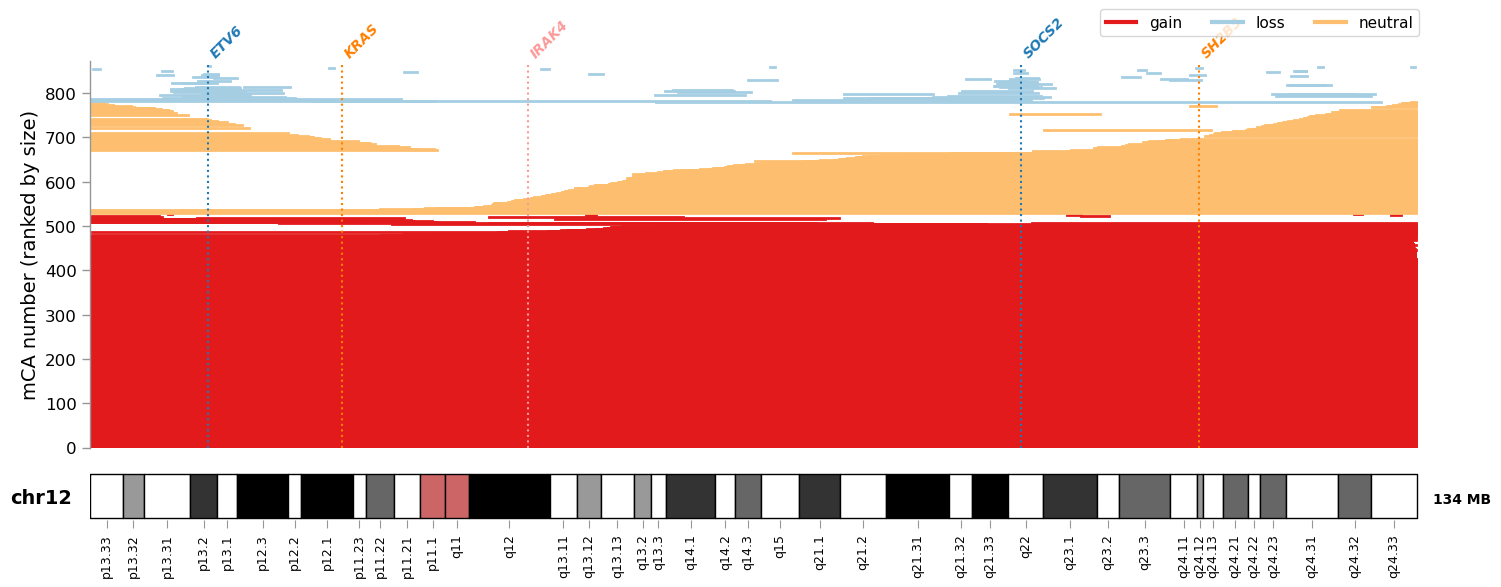

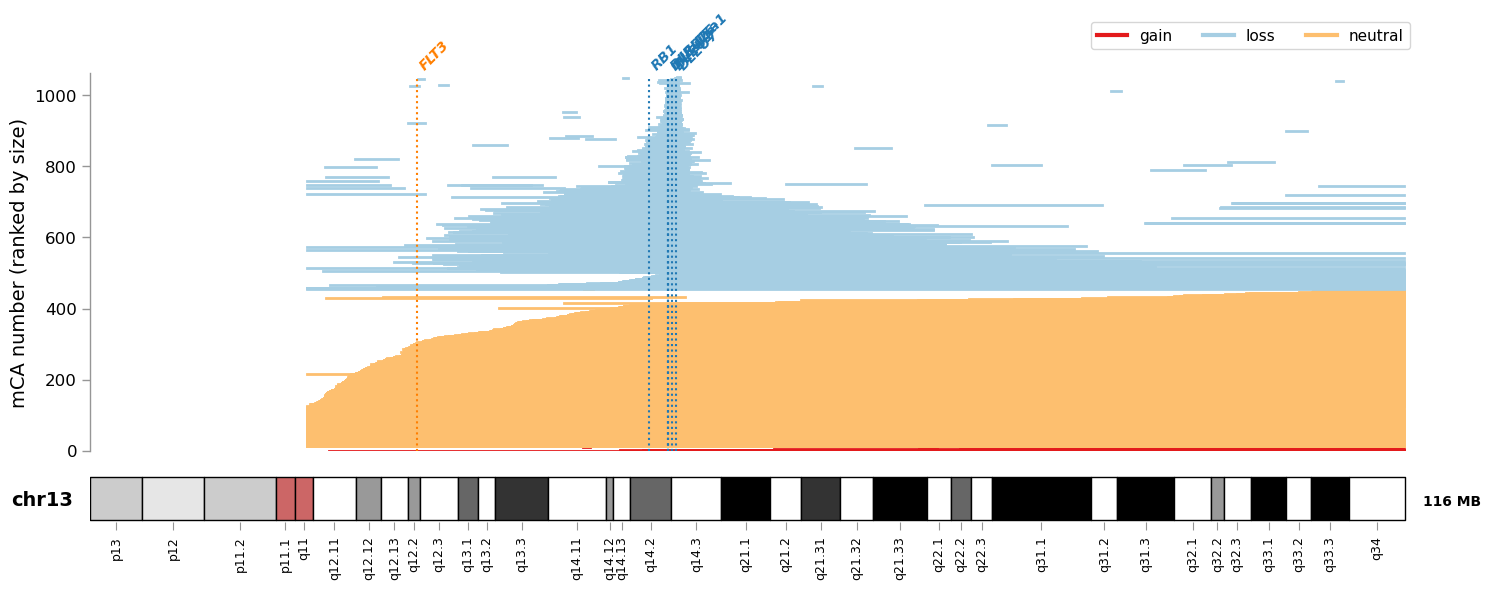

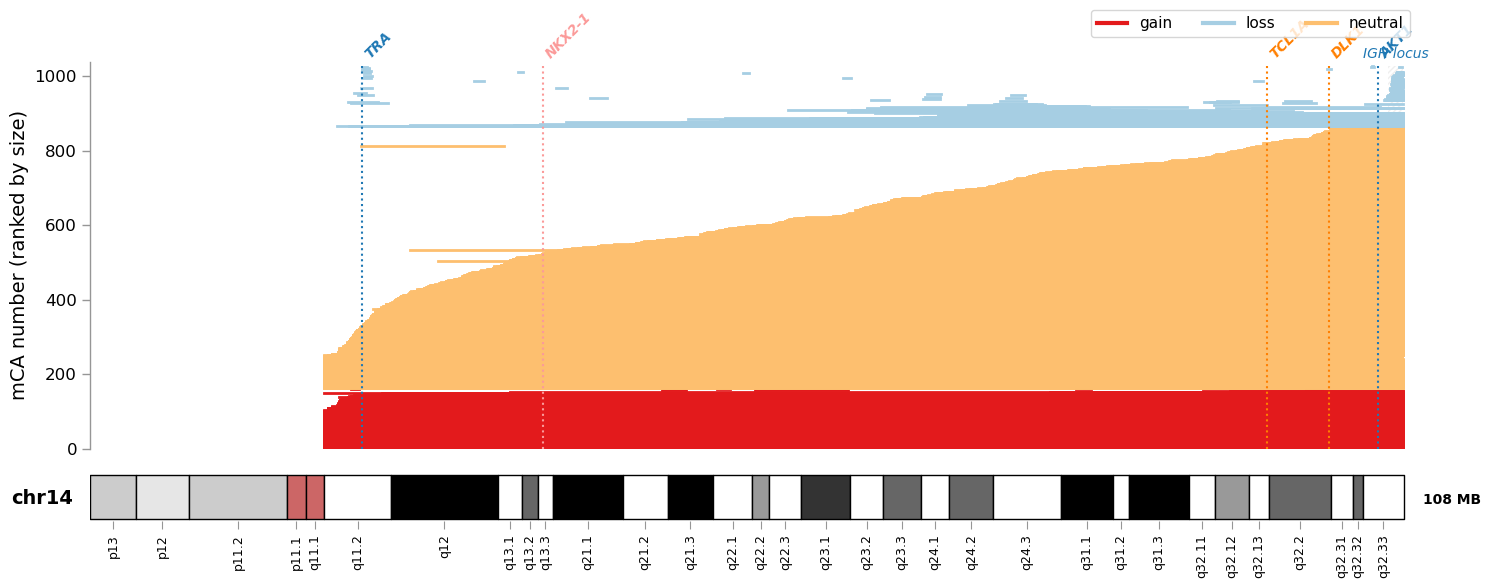

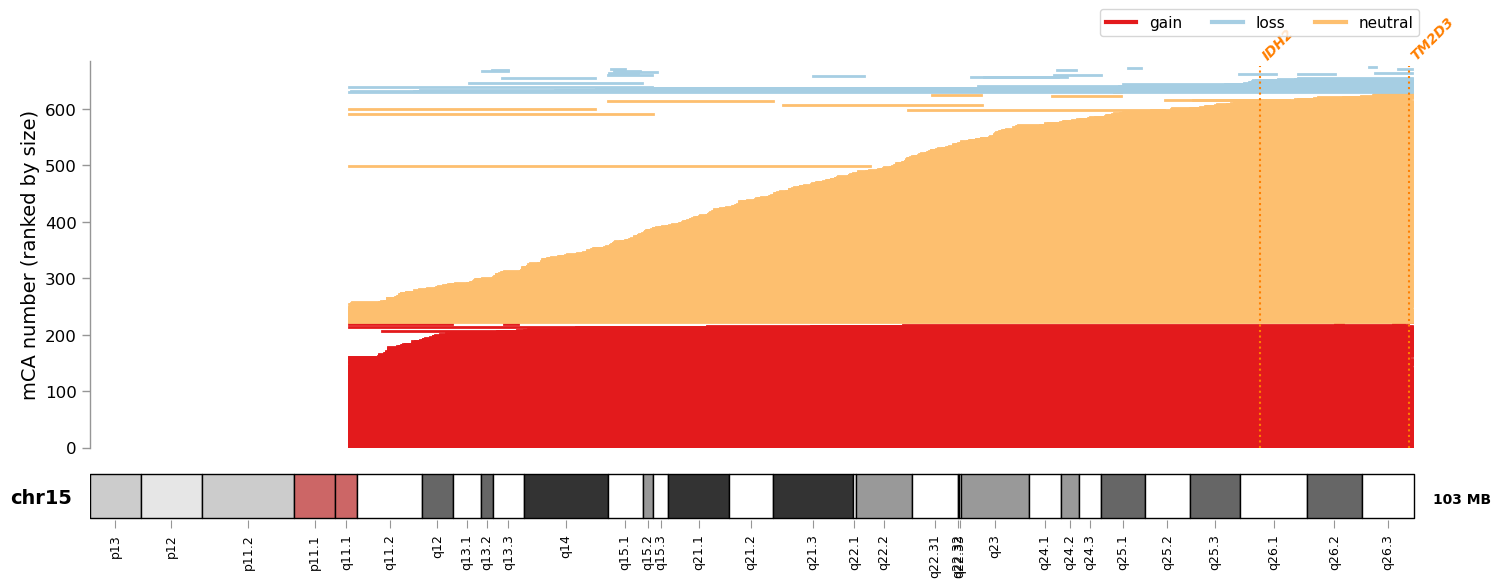

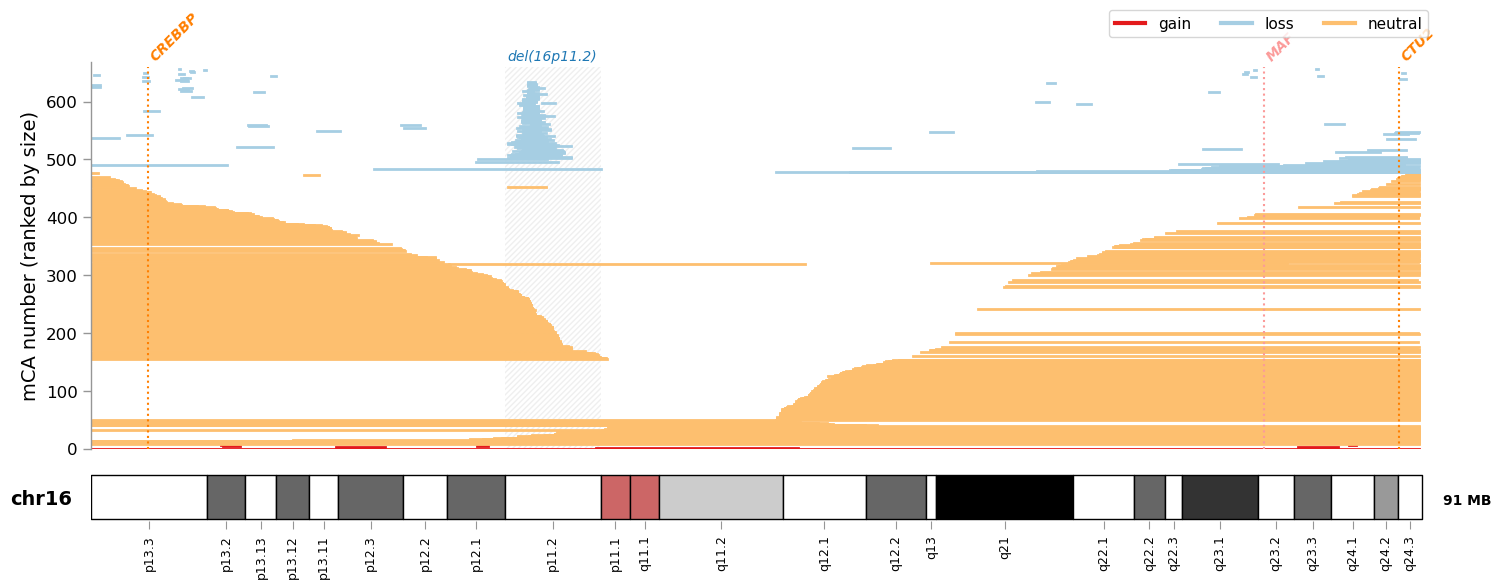

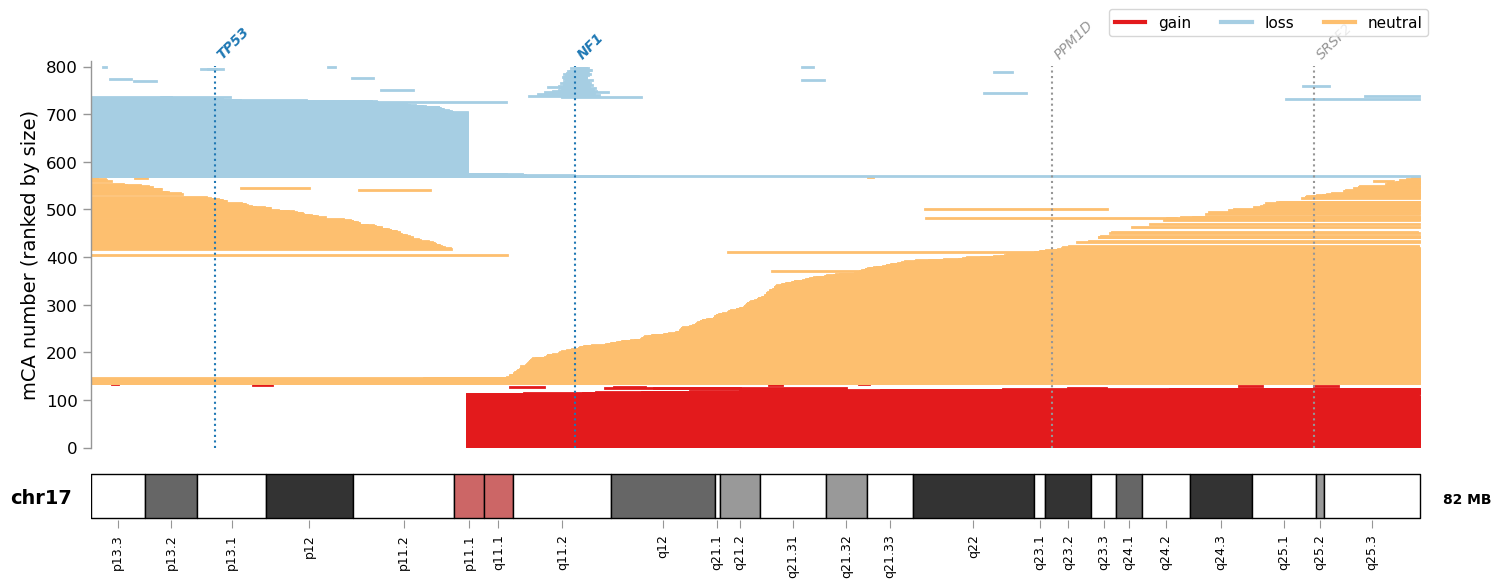

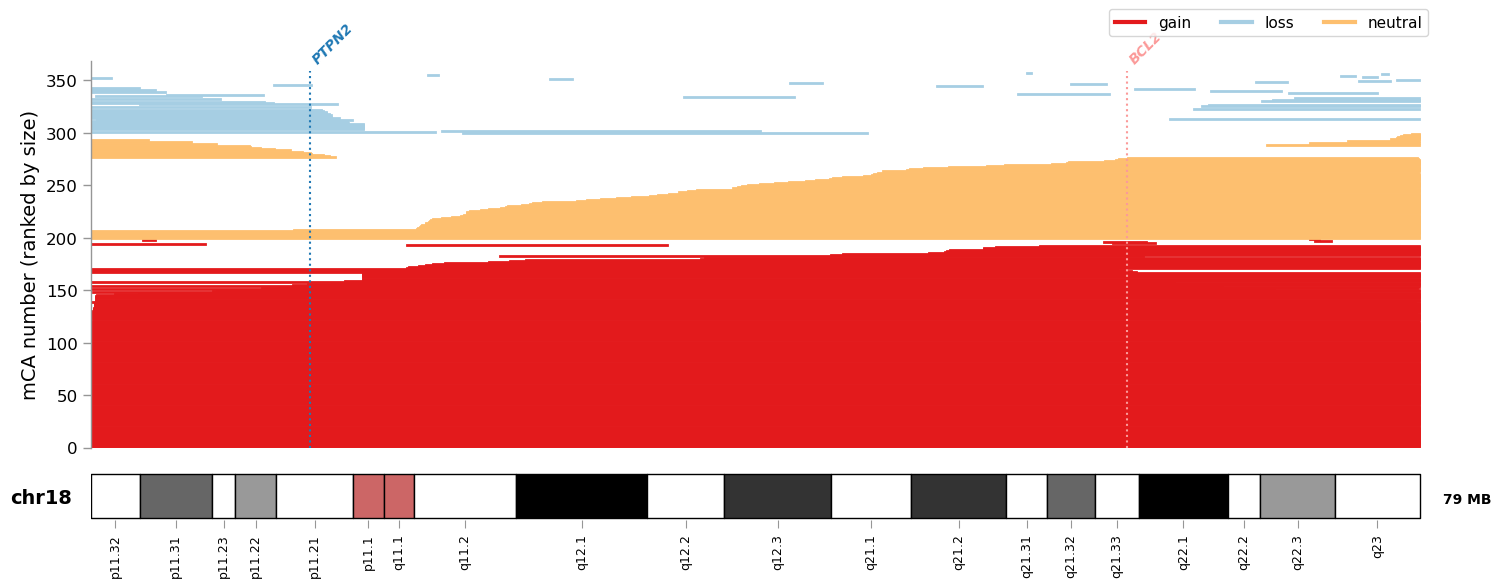

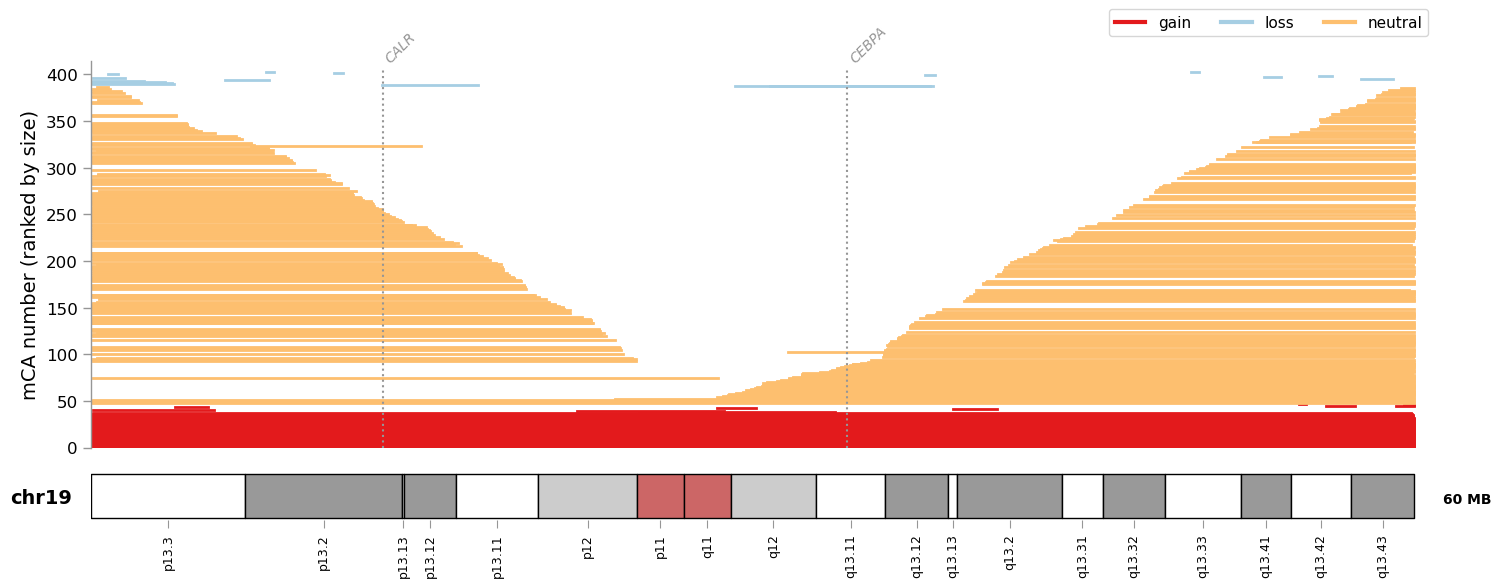

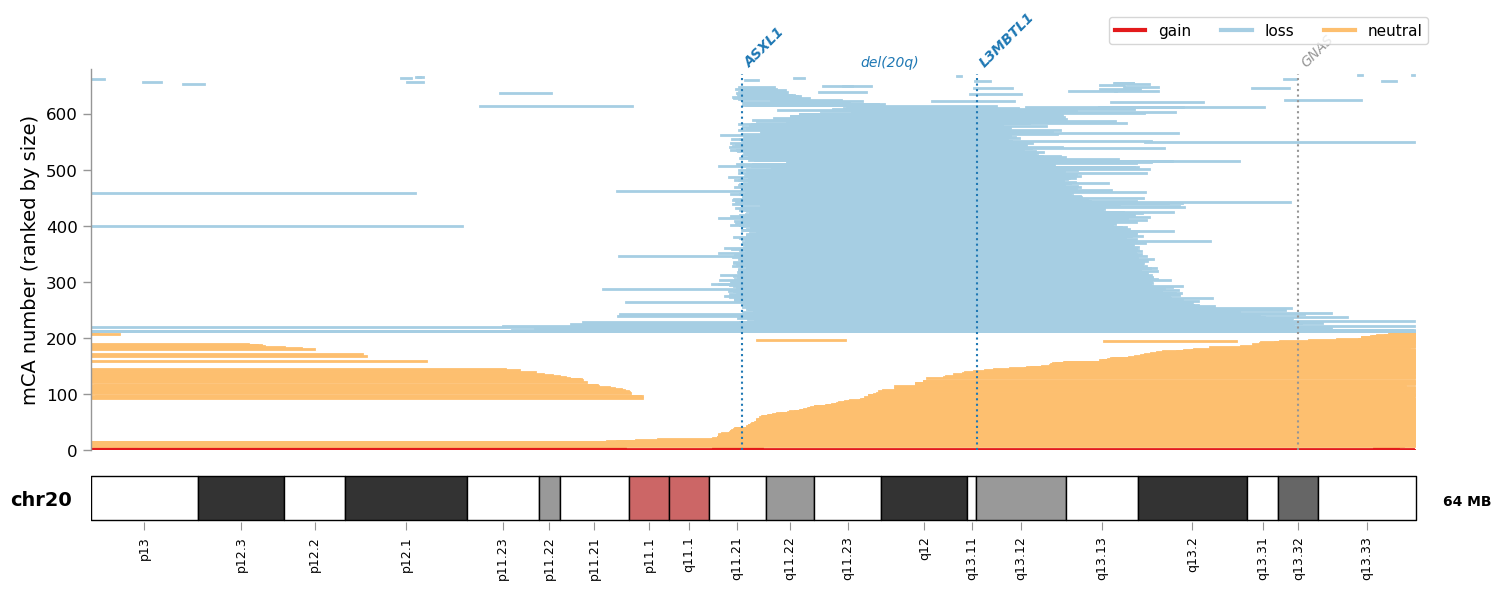

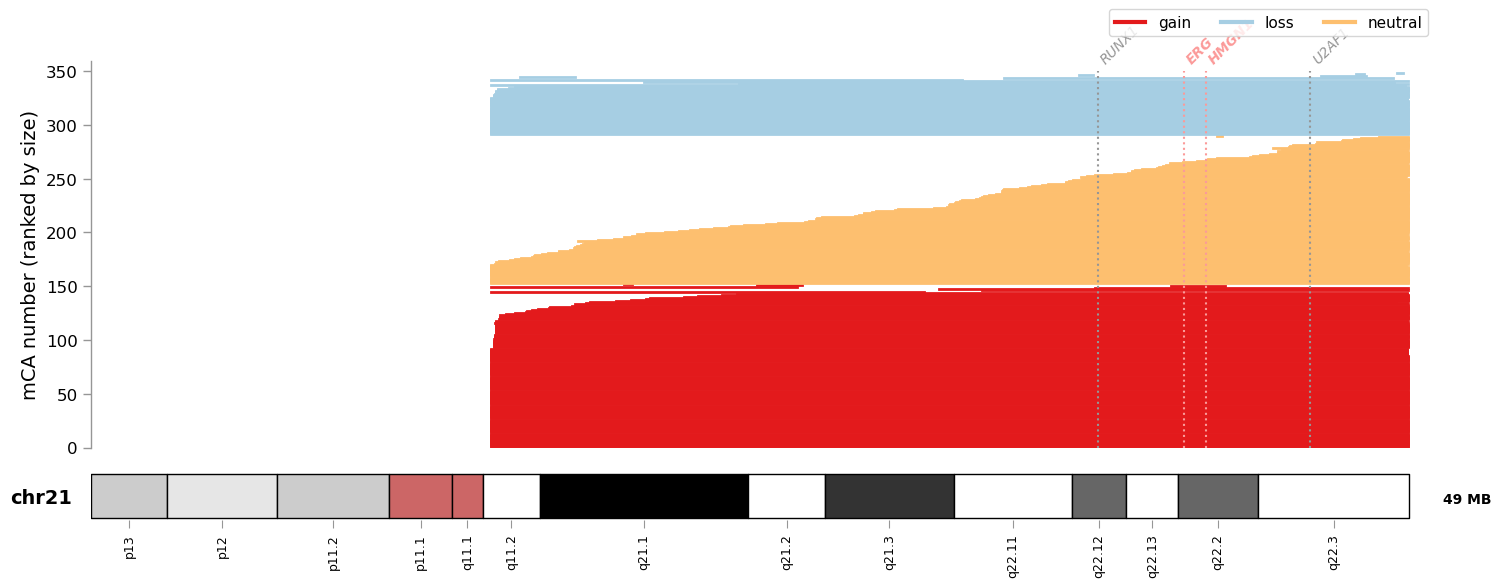

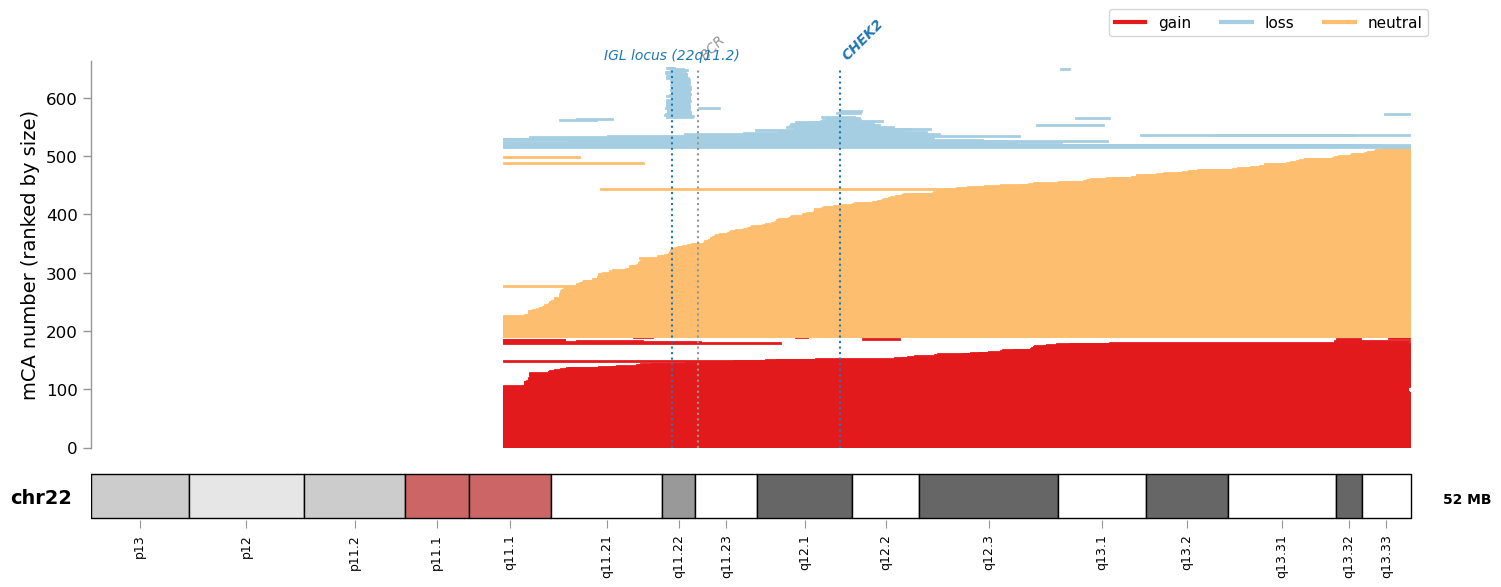

In [21]:
for i in ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22']:
    distribution_mCA(i, genes_involved_per_chromosome, 'all', CNV_dict)